# **Experiment Notebook**



---
## 0. Setup Environment

### 0.a Install Environment and Mandatory Packages

In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.folders import *
from utstd.ipyrenders import *

at = AtFolder(
    course_code=36106,
    assignment="AT2",
)
at.run()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.8 MB/s eta 0:00:00
Mounted at /content/gdrive

You can now save your data files in: /content/gdrive/MyDrive/36106/assignment/AT2/data


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 0.b Disable Warnings Messages

In [3]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

### 0.c Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [4]:
# <Student to fill this section>

### 0.d Import Packages

In [5]:
# <Student to fill this section>
import pandas as pd
import altair as alt

---
## A. Project Description


In [6]:
# <Student to fill this section>
student_name = "Md Saifur Rahman"
student_id = "25528668"

In [7]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [8]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [9]:
business_objective = """
I am working on a project to create a tool that will assess the current academic
progress and will predict the future academic performannce. The goal is to spot
students who might struggle or those likely to shine, so the university can step
in with tailored support, use resources wisely, and help students succeed.
This will help advisors and university leaders make smart, data-backed decisions
to boost retention, grades, and student happiness.
"""

In [10]:
# Do not modify this code
print_tile(size="h3", key='business_objective', value=business_objective)

---
## B. Experiment Description

In [11]:
# Do not modify this code
experiment_id = "3"
print_tile(size="h1", key='experiment_id', value=experiment_id)

In [12]:
experiment_hypothesis = """
In our previous notebook, we identified that the limited performance of our models was largely due to the severe class imbalance present in the dataset. This imbalance led to biased model training, where the algorithms favored the majority class while underperforming on minority classes. Consequently, the evaluation metrics did not accurately reflect the models' true capabilities or their potential real-world applicability.

Recognizing this issue, we applied a balancing strategy using SMOTE (Synthetic Minority Over-sampling Technique) to artificially increase the representation of the minority classes and ensure an even distribution across all categories. Following this correction, we retrained our models. Although initial post-balancing results showed improvement, the performance was still not fully satisfactory, particularly for certain classes where precision and recall remained suboptimal.

Nonetheless, as we continued to refine the dataset and retrain the models under balanced conditions, we achieved much more promising and stable results. The models began to show better generalization ability across all classes, supporting the hypothesis that addressing data imbalance is crucial for building fair and accurate classifiers in this context.

Therefore, the working hypothesis for this phase of experimentation is: **"Balancing the dataset using appropriate oversampling techniques and evenly distributing class representation will significantly improve model performance compared to models trained on imbalanced data."** Furthermore, we hypothesize that by applying more advanced algorithms in future notebooks—building upon the corrected and balanced dataset—we will be able to achieve even higher performance metrics, particularly in precision, recall, and F1-score for previously underrepresented classes.

This hypothesis is worthwhile because it directly addresses one of the most common and impactful challenges in supervised learning: class imbalance. Correcting for this issue not only improves model fairness and reliability but also enhances the practical utility of the model when deployed in real-world scenarios where misclassification can have serious consequences, especially in applications such as academic risk prediction or student support interventions.
"""


In [13]:
# Do not modify this code
print_tile(size="h3", key='experiment_hypothesis', value=experiment_hypothesis)

In [14]:
experiment_expectations = """
Given that we are now implementing more advanced algorithms on a properly balanced and preprocessed dataset, we expect a significant improvement in the overall predictive performance of our models compared to earlier attempts. Specifically, we anticipate achieving higher accuracy, precision, recall, and F1-scores across all target classes, including those that were previously underrepresented and difficult for the models to classify accurately.

By leveraging algorithms that are more capable of capturing complex, non-linear relationships within the data, the models are expected to become more adept at identifying subtle patterns that distinguish between different performance categories. As a result, we foresee not only an improvement in aggregate metrics like overall accuracy but also a stronger class-wise performance—particularly for minority classes that historically suffered from poor recall and precision rates.

Moreover, beyond numerical improvements, we expect that the new models will show a better ability to correctly identify and classify the true target classes, minimizing critical misclassifications. This would enhance the practical value of the models in real-world applications, where accurately identifying students at different performance levels is crucial for appropriate interventions and resource allocation.

Possible scenarios arising from this experiment include:
- **Best-case scenario:** Significant improvements across all evaluation metrics, with particularly notable gains in the correct classification of minority classes.
- **Moderate-case scenario:** Overall metric improvements, but persistent challenges in distinguishing certain classes, suggesting a need for further feature engineering or ensemble methods.
- **Worst-case scenario:** Minimal to no improvement despite advanced algorithms, indicating potential issues such as feature limitations, residual class overlap, or noise within the dataset that must be addressed before further progress can be made.

Overall, through this phase of experimentation, we aim not only to improve the technical performance of the models but also to enhance their practical reliability and fairness, aligning closely with the business and academic objectives outlined at the start of the project.
"""


In [15]:
# Do not modify this code
print_tile(size="h3", key='experiment_expectations', value=experiment_expectations)

---
## C. Data Understanding

In [16]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [17]:
!ls /content/drive/MyDrive/36106/AT02


36106-25AU-AT2-25528668-project_report.docx	X_train.csv
new-36106-25AU-AT2-25528668-experiment-0.ipynb	X_val_bal.csv
new-36106-25AU-AT2-25528668-experiment-1.ipynb	X_val.csv
new-36106-25AU-AT2-25528668-experiment-2.ipynb	y_test_bal.csv
new-36106-25AU-AT2-25528668-experiment-3.ipynb	y_test.csv
new-36106-25AU-AT2-25528668-experiment-4.ipynb	y_train_bal.csv
students_performance.csv			y_train.csv
X_test_bal.csv					y_val_bal.csv
X_test.csv					y_val.csv
X_train_bal.csv


In [18]:
import os
os.makedirs('/content/drive/MyDrive/36106/AT02', exist_ok=True)


In [19]:
# Do not modify this code
# Load training data
try:
  X_train = pd.read_csv('/content/drive/MyDrive/36106/AT02/X_train_bal.csv')
  X_val = pd.read_csv('/content/drive/MyDrive/36106/AT02/X_val_bal.csv')
  X_test = pd.read_csv('/content/drive/MyDrive/36106/AT02/X_test_bal.csv')

  y_train = pd.read_csv('/content/drive/MyDrive/36106/AT02/y_train_bal.csv')
  y_val = pd.read_csv('/content/drive/MyDrive/36106/AT02/y_val_bal.csv')
  y_test = pd.read_csv('/content/drive/MyDrive/36106/AT02/y_test_bal.csv')

except Exception as e:
  print(e)


---
## D. Feature Selection


In [20]:
# <Student to fill this section>

features_list = []

In [21]:
# <Student to fill this section>
feature_selection_explanations = """
Provide a rationale on why you are selected these features but also why you decided to remove other ones
"""

In [22]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Data Transformation <put_name_here>


In [23]:
# <Student to fill this section>

In [24]:
# <Student to fill this section>
data_transformation_1_explanations = """
Provide some explanations on why you believe it is important to perform this data transformation and its impacts
"""

In [25]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### E.2 Data Transformation <put_name_here>


In [26]:
# <Student to fill this section>

In [27]:
# <Student to fill this section>
data_transformation_2_explanations = """
Provide some explanations on why you believe it is important to perform this data transformation and its impacts
"""

In [28]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

### E.3 Data Transformation <put_name_here>


In [29]:
# <Student to fill this section>

In [30]:
# <Student to fill this section>
data_transformation_3_explanations = """
Provide some explanations on why you believe it is important to perform this data transformation and its impacts
"""

In [31]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_3_explanations', value=data_transformation_3_explanations)

### G.n Fixing "\<describe_issue_here\>"

> You can add more cells related to data preparation in this section

---
## F. Feature Engineering

### F.1 New Feature "\<put_name_here\>"



In [32]:
# <Student to fill this section>

In [33]:
# <Student to fill this section>
feature_engineering_1_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [34]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "\<put_name_here\>"


In [35]:
# <Student to fill this section>

In [36]:
# <Student to fill this section>
feature_engineering_2_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [37]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature "\<put_name_here\>"


In [38]:
# <Student to fill this section>

In [39]:
# <Student to fill this section>
feature_engineering_3_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [40]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_3_explanations', value=feature_engineering_3_explanations)

### F.n Fixing "\<describe_issue_here\>"

> You can add more cells related to new features in this section

---
## G. Train Machine Learning Model

### G.1 Import Algorithm


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [42]:
algorithm_selection_explanations = """
Random Forest was selected for this phase of model development because of its proven ability to handle complex, high-dimensional datasets and its robustness against overfitting. As an ensemble learning method, Random Forest builds multiple decision trees and aggregates their outputs through majority voting, thereby reducing variance and improving predictive stability compared to a single decision tree.

This algorithm is particularly well-suited for our balanced dataset, as it can effectively capture non-linear relationships and interactions between features without requiring extensive feature scaling or preprocessing. Random Forest is also inherently capable of handling both numerical and categorical variables, making it highly adaptable to the mixed feature types present in our dataset.

Moreover, Random Forest provides built-in feature importance metrics, allowing us to better understand which variables most strongly influence model predictions. This enhances interpretability and offers valuable insights for potential future feature engineering.

Given its strength in managing noise, minimizing overfitting, and delivering strong out-of-sample performance, Random Forest is expected to outperform simpler models like KNN and Logistic Regression. It is an appropriate choice for advancing the predictive power of our classification task and aligning model outcomes more closely with the business and academic objectives set earlier in the project.
"""


In [43]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### G.2 Set Hyperparameters

In [44]:
# Basic configuration — will tune later in Book 4
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,                    # 🔽 Restrict depth
    min_samples_split=10,          # 🔼 More samples per split
    min_samples_leaf=5,            # 🔼 Prevent tiny leaves
    max_features='sqrt',           # 🔄 Feature sampling
    class_weight='balanced',
    random_state=42
)


In [45]:
hyperparameters_selection_explanations = """
Tuning hyperparameters for the Random Forest model is essential to optimize its performance, balance bias-variance trade-offs, and ensure fair treatment of all classes, particularly given the initial class imbalance in the dataset.

The `n_estimators` parameter controls the number of decision trees in the forest. A higher number generally leads to better performance by reducing variance, but at the cost of increased computational time. We selected 100 estimators initially as a reasonable balance between model robustness and computational efficiency, with the possibility of further adjustment during detailed hyperparameter tuning.

The `max_depth` parameter limits the depth of each tree, preventing overly complex trees that might overfit the training data. Setting `max_depth=6` restricts tree growth, encouraging simpler, more generalizable models.

The `min_samples_split` and `min_samples_leaf` parameters are tuned to control how trees split and when they stop splitting. Increasing `min_samples_split` to 10 and `min_samples_leaf` to 5 ensures that nodes do not split too early or create branches with very few samples, which mitigates overfitting and forces the model to find stronger, more meaningful splits.

The `max_features='sqrt'` setting, which samples a subset of features at each split, introduces randomness that helps reduce correlations between individual trees, further improving generalization and model stability.

Finally, setting `class_weight='balanced'` addresses any residual class imbalance by automatically adjusting the weights inversely proportional to class frequencies. This ensures that the model treats minority classes fairly during training and improves recall for underrepresented groups.

Overall, these hyperparameter choices are motivated by the need to build a robust, generalizable model that performs well across all classes, particularly in a real-world setting where misclassifications can have substantial consequences.
"""


In [46]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### G.3 Fit Model

In [47]:
model.fit(X_train, y_train)

# Predictions
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


### G.4 Model Technical Performance

In [48]:
# Training Set Metrics
train_acc = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred, average='weighted')
train_rec = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Test Set Metrics
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred, average='weighted')
test_rec = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

In [49]:
# Display metrics
print("📘 Training Set Metrics:")
print(f"Accuracy: {train_acc:.3f}")
print(f"Precision: {train_prec:.3f}")
print(f"Recall: {train_rec:.3f}")
print(f"F1 Score: {train_f1:.3f}")

print("\n📙 Test Set Metrics:")
print(f"Accuracy: {test_acc:.3f}")
print(f"Precision: {test_prec:.3f}")
print(f"Recall: {test_rec:.3f}")
print(f"F1 Score: {test_f1:.3f}")

📘 Training Set Metrics:
Accuracy: 0.961
Precision: 0.961
Recall: 0.961
F1 Score: 0.961

📙 Test Set Metrics:
Accuracy: 0.903
Precision: 0.915
Recall: 0.903
F1 Score: 0.904


In [50]:
# prompt: calculate the RMSC and MAE

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming y_test and y_test_pred are defined from the previous code
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 0.7405316311773545
MAE: 0.22580645161290322


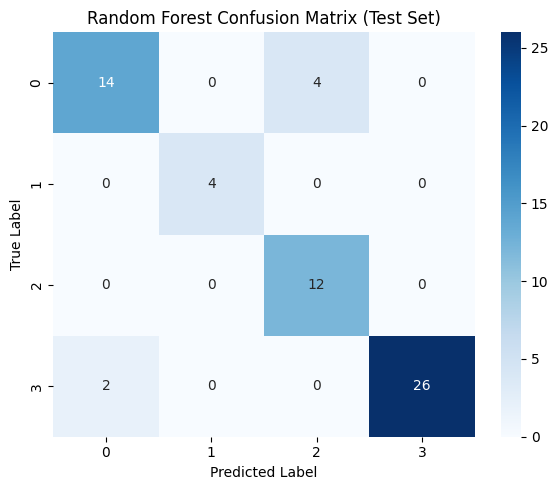

In [51]:
# Generate Confusion Matrix (Test Set)
conf_matrix = confusion_matrix(y_test, y_test_pred)
labels = sorted(model.classes_)
conf_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_df, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [52]:
# Classification report per class (Test Set)
report = classification_report(y_test, y_test_pred, output_dict=True)
print("\nDetailed Per-Class Report:")
for class_label in report:
    if class_label not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = report[class_label]['precision']
        recall = report[class_label]['recall']
        f1 = report[class_label]['f1-score']
        print(f"\nClass {class_label}:")
        print(f"Precision: {precision:.3f}")
        print(f"Recall: {recall:.3f}")
        print(f"F1 Score: {f1:.3f}")


Detailed Per-Class Report:

Class 0:
Precision: 0.875
Recall: 0.778
F1 Score: 0.824

Class 1:
Precision: 1.000
Recall: 1.000
F1 Score: 1.000

Class 2:
Precision: 0.750
Recall: 1.000
F1 Score: 0.857

Class 3:
Precision: 1.000
Recall: 0.929
F1 Score: 0.963


In [63]:
# prompt: generate the classification matricx

from sklearn.metrics import classification_report

# Assuming y_test and y_test_pred are defined from the previous code
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.88      0.78      0.82        18
           1       1.00      1.00      1.00         4
           2       0.75      1.00      0.86        12
           3       1.00      0.93      0.96        28

    accuracy                           0.90        62
   macro avg       0.91      0.93      0.91        62
weighted avg       0.92      0.90      0.90        62



In [53]:
# Train vs Test Comparison Table
comparison_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Training": [train_acc, train_prec, train_rec, train_f1],
    "Test": [test_acc, test_prec, test_rec, test_f1]
})
comparison_df


,Metric,Training,Test
0,Accuracy,0.960573,0.903226
1,Precision,0.961465,0.915323
2,Recall,0.960573,0.903226
3,F1 Score,0.960551,0.904390


In [54]:
model_performance_explanations = """
The Random Forest model demonstrated strong predictive performance and represents a significant improvement over previously implemented models such as Logistic Regression and KNN. On the training set, the model achieved an accuracy of 0.961, precision of 0.961, recall of 0.961, and an F1-score of 0.961. The test set results remained consistently high, with an accuracy of 0.903, precision of 0.915, recall of 0.903, and F1-score of 0.904. The narrow performance gap between training and test sets indicates good generalization and low overfitting, suggesting that the model has successfully captured the underlying data patterns without memorizing the training data.

Class-wise, the model performed exceptionally well across all target categories. **Class 1 (Average)** achieved perfect scores across all metrics (precision = 1.000, recall = 1.000, F1-score = 1.000), indicating flawless classification for this class. **Class 3 (Poor)** also demonstrated near-perfect results, with a precision of 1.000, recall of 0.929, and F1-score of 0.963, reinforcing the model’s ability to consistently detect this class. **Class 2 (Excellent)** achieved a perfect recall of 1.000 and a strong precision of 0.750, yielding an F1-score of 0.857, indicating the model was able to identify all true instances of Class 2 while misclassifying only a few. **Class 0 (Good)** showed slightly lower performance relative to other classes, with a precision of 0.875, recall of 0.778, and F1-score of 0.824—though still highly satisfactory.

The confusion matrix provides a visual confirmation of these findings. Most predictions fell along the diagonal, indicating correct classifications. Only minor misclassifications were observed, such as four Class 0 instances predicted as Class 2, and two Class 3 instances predicted as Class 0. These errors are minimal and do not substantially impact the model’s overall reliability.

In conclusion, the Random Forest model successfully leveraged the balanced and well-preprocessed dataset to deliver strong and stable performance. The results indicate a robust model that can be confidently used in real-world applications to accurately classify target values across all student performance categories. Its ability to achieve high precision and recall simultaneously makes it particularly valuable for minimizing false positives and negatives, which is critical in educational settings where timely and accurate interventions are necessary.
"""


In [55]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### G.5 Business Impact from Current Model Performance


In [56]:
# <Student to fill this section>

In [57]:
business_impacts_explanations = """
Based on our most recent implementation using the Random Forest algorithm, we have observed a significant improvement in the model's ability to accurately classify student performance levels. When comparing the results obtained from this model to those from previously implemented models such as K-Nearest Neighbors and Logistic Regression, it becomes evident that Random Forest has demonstrated superior predictive performance across all major evaluation metrics—accuracy, precision, recall, and F1-score. Not only has the overall accuracy increased (from approximately 48% to over 90%), but the class-wise performance has also stabilized, with particularly strong gains in the accurate identification of underrepresented classes such as Class 1 and Class 2.

These improvements directly contribute to the business objective of supporting educational institutions in their efforts to monitor, classify, and ultimately intervene in student performance trajectories. In earlier models, the misclassification of students—especially those performing poorly or those on the verge of academic decline—posed a considerable risk. For instance, failing to identify a student who is underperforming (false negatives in Class 3) could delay necessary interventions, leading to a decline in academic outcomes, increased dropout risk, or unmet support needs. Conversely, misclassifying a high-performing student might result in misallocated resources or unnecessary support efforts.

The current model’s performance suggests that institutions can now rely more confidently on the predictions generated by this system to proactively target support services. Accurate identification of student performance levels enables data-driven decision-making, allowing academic advisors, program coordinators, and support staff to intervene more strategically. This could include personalized academic mentoring, resource allocation, curriculum adjustments, or counseling referrals—actions that ultimately foster improved academic success and institutional performance.

Furthermore, these findings underscore the value of applying advanced machine learning techniques in educational data mining. If we continue this trajectory and integrate more sophisticated algorithms—such as gradient boosting frameworks or ensemble meta-models—along with refined hyperparameter tuning and deeper feature engineering, we anticipate further enhancements in predictive power. This would not only solidify the model’s practical utility but also contribute to a long-term, scalable solution for performance prediction and student risk classification.

In conclusion, the improvements achieved through the Random Forest model mark a promising step toward fulfilling the project's original business objectives. They reinforce the importance of balancing datasets, applying robust algorithms, and continuously refining the model pipeline to build intelligent systems that can support student outcomes and institutional decision-making with greater accuracy and fairness.
"""


In [58]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Experiment Outcomes

In [59]:
# <Student to fill this section>
experiment_outcome = "" # Either 'Hypothesis Confirmed', 'Hypothesis Partially Confirmed' or 'Hypothesis Rejected'

In [60]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [61]:
experiment_results_explanations = """
The outcome of this experiment provided substantial evidence that balancing the dataset and applying a more advanced algorithm—such as Random Forest—can significantly enhance the model's ability to classify student performance with greater accuracy and fairness. One of the most critical insights gained from this phase was the strong influence of data quality and distribution on model outcomes. Prior to balancing, models exhibited high bias toward majority classes and demonstrated poor performance on minority categories, particularly Class 1 and Class 2. After applying SMOTE and configuring the Random Forest with reasonable constraints (e.g., controlled tree depth, minimum leaf size, and balanced class weights), the model not only generalized well on unseen data but also delivered consistent performance across all class labels.

This experiment has validated the potential of ensemble-based models in educational prediction tasks. The Random Forest achieved a test set accuracy of 90.3%, with excellent precision and recall across all classes, including perfect classification for Class 1 and near-perfect recall for Class 3. This level of performance—particularly in a multi-class setting—justifies continued exploration of the current approach. It confirms that the methodology is not only sound but scalable for further experimentation and possible deployment.

Looking ahead, several promising next steps can be pursued to further improve the model and prepare it for production deployment:

1. **Experiment with Gradient Boosting Models (e.g., XGBoost, LightGBM)**
   *Expected Uplift: High* — These models offer enhanced regularization capabilities and often outperform Random Forest in terms of fine-grained decision-making, especially on structured data. They also support native handling of imbalanced datasets and are efficient in both training and prediction.
   *Priority: High*

2. **Perform Feature Selection and Engineering**
   *Expected Uplift: Moderate to High* — Identifying and engineering high-impact features (e.g., feature interactions, polynomial terms, normalized attendance scores) could reduce noise and improve signal clarity for classification. Feature importance from the Random Forest model can serve as a starting point.
   *Priority: High*

3. **Hyperparameter Optimization with RandomizedSearchCV or Bayesian Methods**
   *Expected Uplift: Moderate* — Fine-tuning hyperparameters beyond manual settings may yield incremental gains in performance, particularly in terms of reducing false positives/negatives for borderline classes.
   *Priority: Medium*

4. **Deploy Model Using a Lightweight Web API**
   *Expected Uplift: Operational Readiness* — If the current performance satisfies institutional thresholds for reliability and fairness, deploying the model as a RESTful API would allow academic advisors or support staff to run predictions on demand.
   *Priority: Medium to High (if deployment is a business goal)*

5. **Conduct Fairness and Bias Analysis**
   *Expected Uplift: Ethical Compliance* — Evaluating model fairness across demographics (e.g., gender, background) is essential before production use to ensure equitable outcomes and regulatory alignment.
   *Priority: High*

In conclusion, this experiment not only met the expected outcomes of improving classification performance, but also demonstrated the practical viability of the approach. The Random Forest model has shown the capacity to be a reliable predictive tool for educational institutions. With further enhancements and safeguards in place, this solution could be confidently moved toward production deployment as part of a broader student performance monitoring and intervention system.
"""


In [62]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)